<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/An-liseEstat-stica/blob/main/Trilha4/Trilha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#library(readr)
#library(data.table)
#library(dplyr)
#library(ggplot2)
#library(ggpubr)

# PROBLEMA 1
# criando o data frame
x <- c(5.2,5.1,4.9,4.6,4.7,4.8,4.6,4.9)
y <- c(13,15,16,20,19,17,21,16)
dados <- data.frame(x,y)


In [7]:
# Primeiras analises
head(dados)
tail(dados)
summary(dados)
str(dados)

,x,y
,<dbl>,<dbl>
1,5.2,13
2,5.1,15
3,4.9,16
4,4.6,20
5,4.7,19
6,4.8,17


,x,y
,<dbl>,<dbl>
3,4.9,16
4,4.6,20
5,4.7,19
6,4.8,17
7,4.6,21
8,4.9,16


       x               y        
 Min.   :4.600   Min.   :13.00  
 1st Qu.:4.675   1st Qu.:15.75  
 Median :4.850   Median :16.50  
 Mean   :4.850   Mean   :17.12  
 3rd Qu.:4.950   3rd Qu.:19.25  
 Max.   :5.200   Max.   :21.00  

'data.frame':	8 obs. of  2 variables:
 $ x: num  5.2 5.1 4.9 4.6 4.7 4.8 4.6 4.9
 $ y: num  13 15 16 20 19 17 21 16


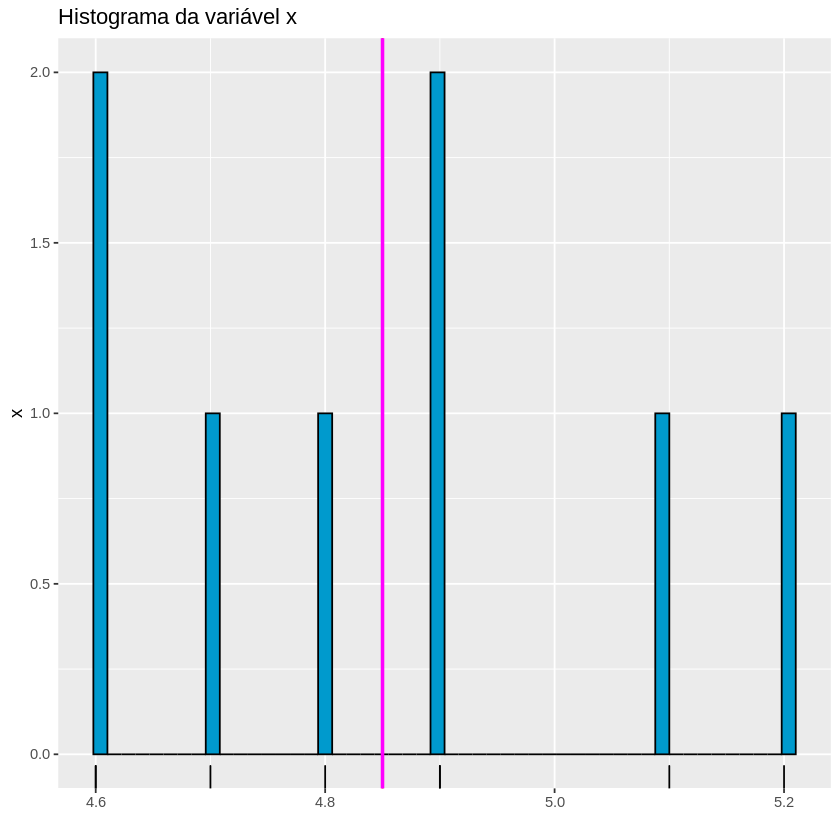

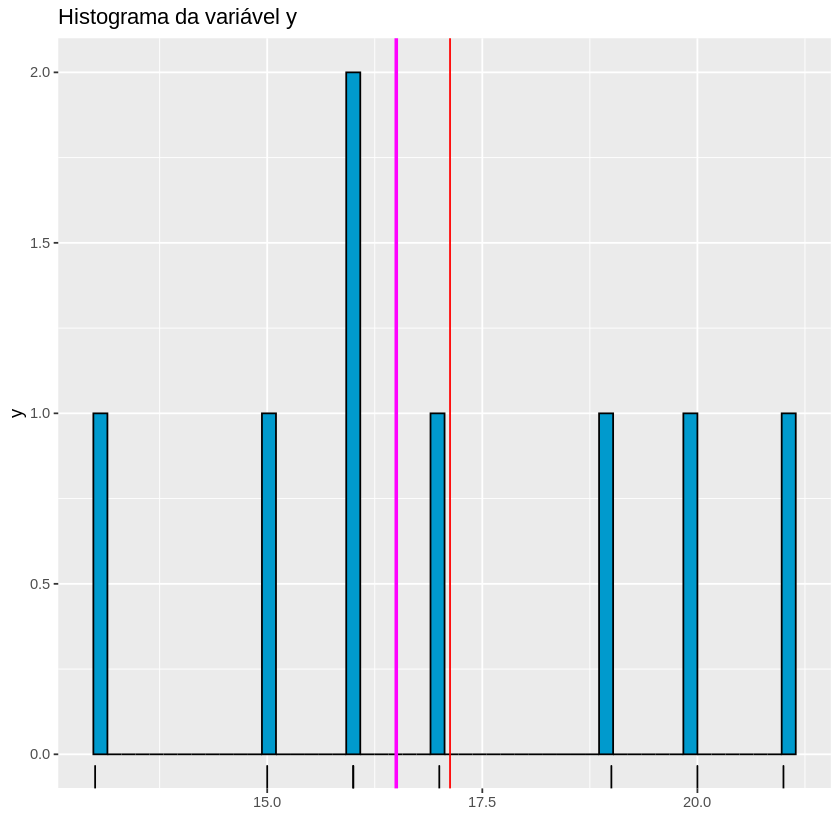

In [11]:
# construindo gráfico para ter uma noção inicial dos dados
# Grafico histograma
ggplot(data=dados) +
  geom_histogram(
    aes(x),bins = 50, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável x", y = "x",
         x = "") +
    geom_vline(xintercept = mean(dados$x), color = "red") +
    geom_rug(aes(x)) +
    geom_vline(xintercept = median(dados$x), color = "magenta", lwd = 1)

ggplot(data=dados) +
  geom_histogram(
    aes(y),bins = 50, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável y", y = "y",
         x = "") +
    geom_vline(xintercept = mean(dados$y), color = "red") +
    geom_rug(aes(y)) +
    geom_vline(xintercept = median(dados$y), color = "magenta", lwd = 1)

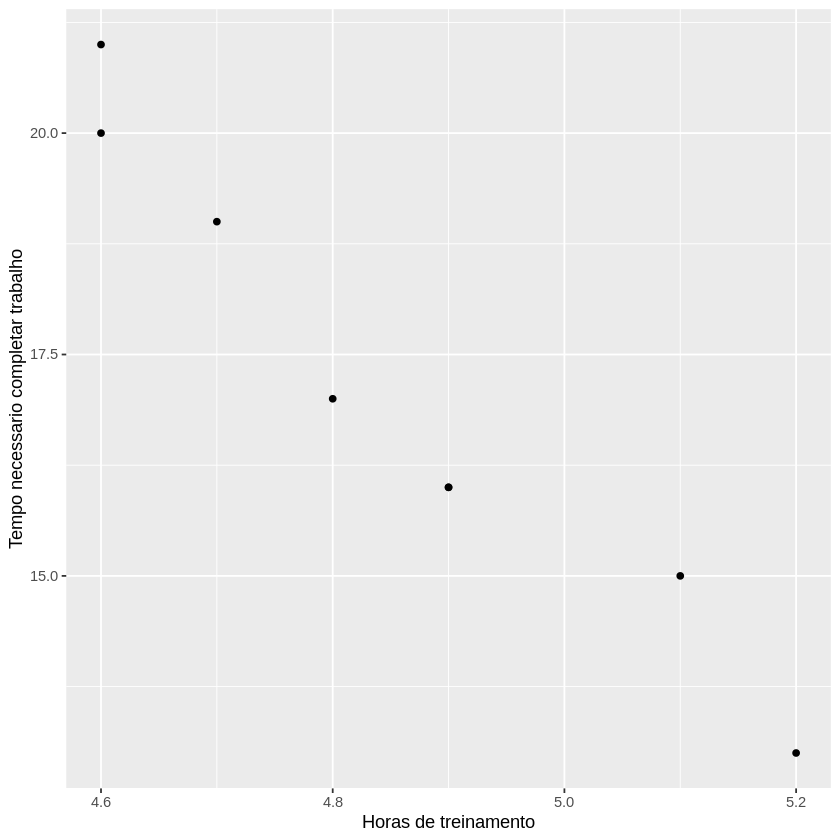

In [19]:
# Grafico de pontos - dispersao
ggplot(data=dados) +
  geom_point(
    aes(x = x, y = y)) +
    labs(y = "Tempo necessario completar trabalho",
         x = "Horas de treinamento", show.legend=TRUE) +
    geom_abline(slope=0, intercept=mean(dados$x), linetype = 2, color="red") 

`geom_smooth()` using formula 'y ~ x'



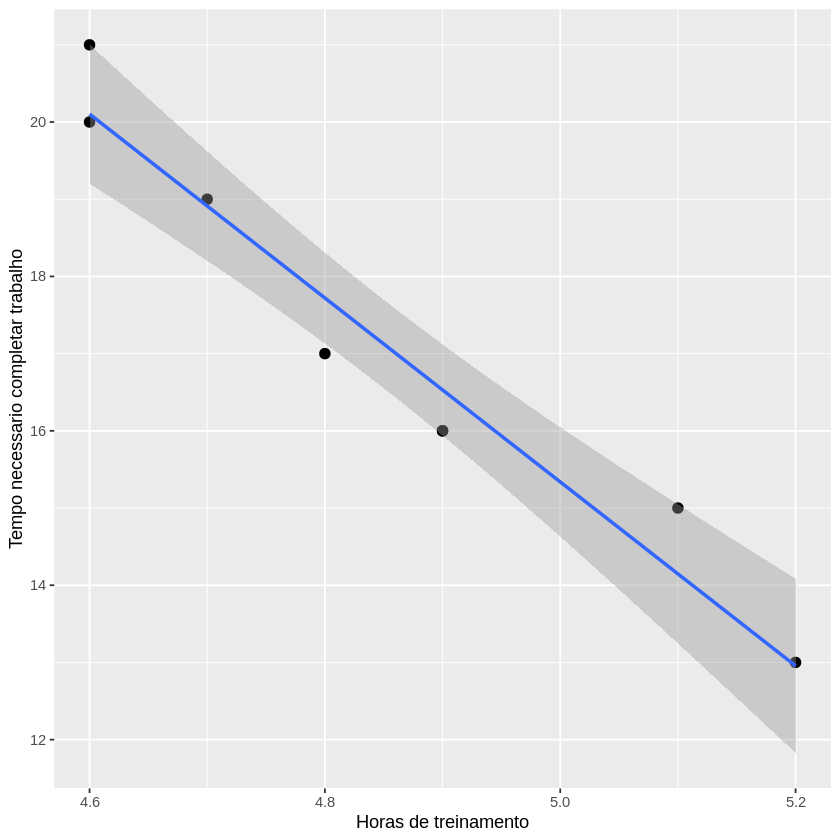

In [21]:
ggplot(data=dados, aes(x = x, y = y)) +
  geom_point(shape = 20, size = 4, color = "black") +
  geom_smooth(method = lm) +
    labs(y = "Tempo necessario completar trabalho",
         x = "Horas de treinamento", show.legend=TRUE) 

In [22]:
# Modelo Linear dos meus dados
mod_1 <- lm(y ~ x, data=dados)
mod_1
summary(mod_1)
anova(mod_1)


Call:
lm(formula = y ~ x, data = dados)

Coefficients:
(Intercept)            x  
      74.90       -11.91  



Call:
lm(formula = y ~ x, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72059 -0.52941 -0.02941  0.27941  0.89706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.897      5.514   13.58 9.88e-06 ***
x            -11.912      1.136  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6624 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,48.242647,48.2426471,109.9609,4.415513e-05
Residuals,6,2.632353,0.4387255,NA,NA


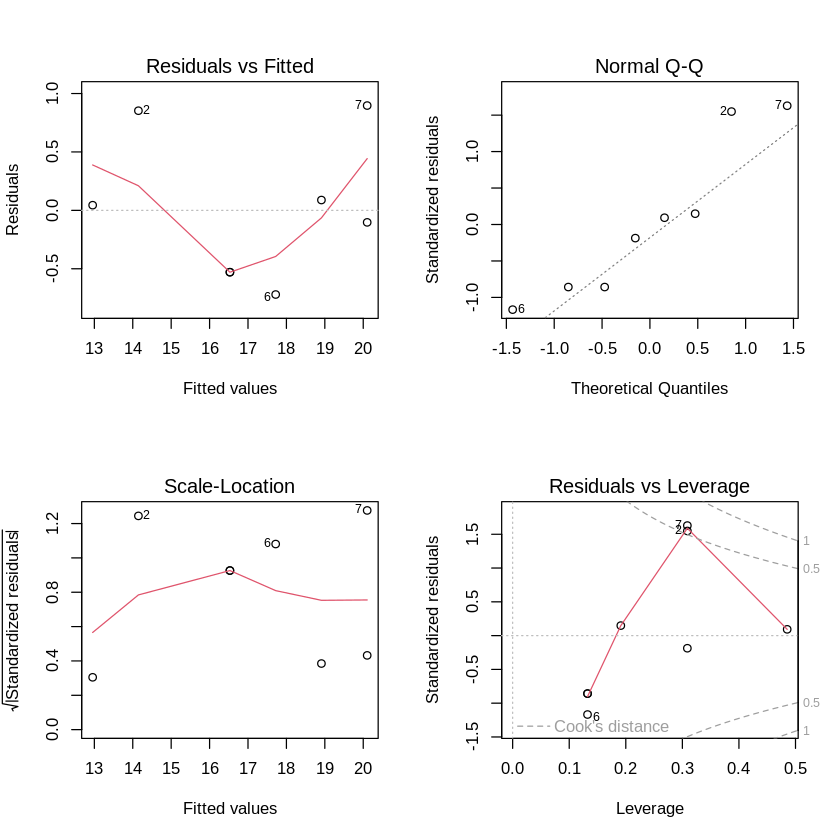

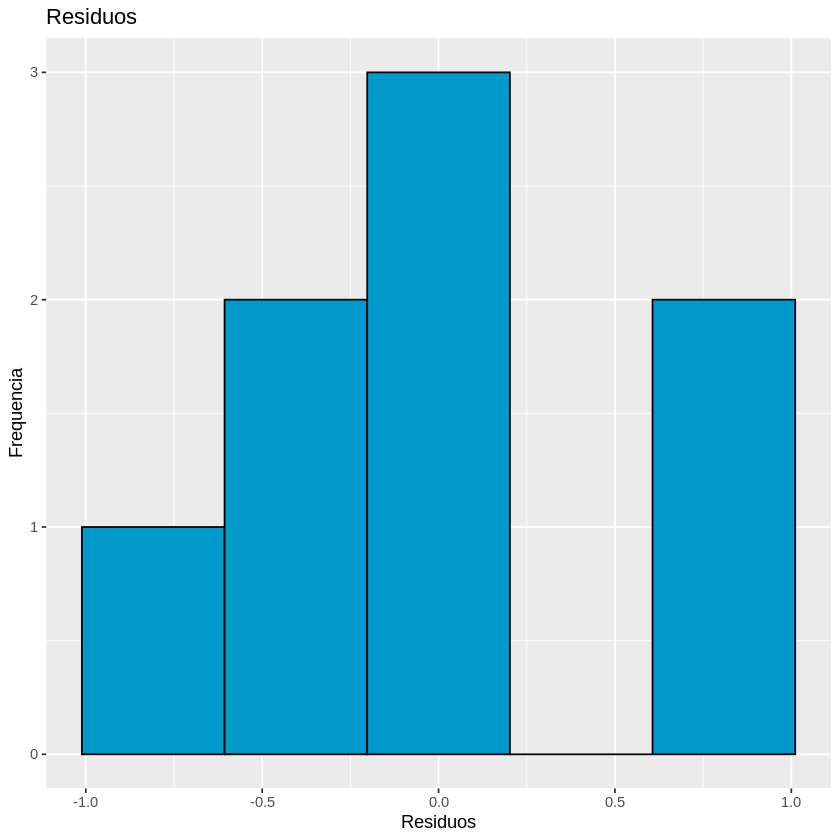

In [26]:
# grafico de residuos
par(mfrow=c(2,2))
plot(mod_1)

mod_1.df <- as.data.frame(residuals(mod_1))
names(mod_1.df) <- c("residuos")

ggplot(data=mod_1.df) +
  geom_histogram(
    aes(residuos),bins = 5, fill = "deepskyblue3", color = "black") +
    labs(title = "Residuos", y = "Frequencia",
         x = "Residuos") 

In [32]:
# PROBLEMA 2
# Importa dados 
pib_gap <- read.csv(file = 'pib_gapminder.csv', stringsAsFactors = TRUE)
head(pib_gap)
tail(pib_gap)

,pais,ano,pop,continente,expVida,pibPercap
,<fct>,<int>,<dbl>,<fct>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453
2,Afghanistan,1957,9240934,Asia,30.332,820.8530
3,Afghanistan,1962,10267083,Asia,31.997,853.1007
4,Afghanistan,1967,11537966,Asia,34.020,836.1971
5,Afghanistan,1972,13079460,Asia,36.088,739.9811
6,Afghanistan,1977,14880372,Asia,38.438,786.1134


,pais,ano,pop,continente,expVida,pibPercap
,<fct>,<int>,<dbl>,<fct>,<dbl>,<dbl>
1699,Zimbabwe,1982,7636524,Africa,60.363,788.8550
1700,Zimbabwe,1987,9216418,Africa,62.351,706.1573
1701,Zimbabwe,1992,10704340,Africa,60.377,693.4208
1702,Zimbabwe,1997,11404948,Africa,46.809,792.4500
1703,Zimbabwe,2002,11926563,Africa,39.989,672.0386
1704,Zimbabwe,2007,12311143,Africa,43.487,469.7093


In [33]:
summary(pib_gap)
str(pib_gap)

          pais           ano            pop               continente 
 Afghanistan:  12   Min.   :1952   Min.   :6.001e+04   Africa  :624  
 Albania    :  12   1st Qu.:1966   1st Qu.:2.794e+06   Americas:300  
 Algeria    :  12   Median :1980   Median :7.024e+06   Asia    :396  
 Angola     :  12   Mean   :1980   Mean   :2.960e+07   Europe  :360  
 Argentina  :  12   3rd Qu.:1993   3rd Qu.:1.959e+07   Oceania : 24  
 Australia  :  12   Max.   :2007   Max.   :1.319e+09                 
 (Other)    :1632                                                    
    expVida        pibPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  
                                   

'data.frame':	1704 obs. of  6 variables:
 $ pais      : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...
